<center> # Naiwny klasyfikator bayesowski</center>

Celem ćwiczenia jest zapoznanie się z technikami konstrukcji naiwnego klasywikatora bayesowskiego. 

Ćwiczenie oparte jest o artykuł z [linku](https://www.kaggle.com/prashant111/naive-bayes-classifier-in-python/notebook)

In [79]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
import sklearn as skl


Na początku proszę wczytać plik __data.csv__ używając jako separatora ',':

In [80]:

df = pd.read_csv("data.csv",sep=',')
df


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


W następnie sprawdź które z kolumn zawierają dane tekstowe lub liczbowe. W tym celu sprawdź wartość  argumentu *dtype* z odpowiednim warunkiem:

In [81]:
categorical = np.array(df.dtypes[df.dtypes == object].index)

print('Dane tektowe zawierają kolumny :\n\n', categorical)


Dane tektowe zawierają kolumny :

 ['workclass' 'education' 'marital_status' 'occupation' 'relationship'
 'race' 'sex' 'native_country' 'income']


Sprawdź czy dane w kolumnach nie zawierają braków a jeżeli tak uzupełnij je według znanych Ci metod:

In [82]:
df[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
income            0
dtype: int64

In [83]:
for i in categorical:
    df[i].replace(' ?',np.NaN, inplace=True)

Na przygotowanych danych przeprowadź proces tworzenia zbiorów uczących i testowych, tak by klasyfikator rozpoznawał do której z grup w kolumnie 'income' należy opisywana osoba


In [84]:
X = df.drop(['income'],axis=1)
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


Przy pomocy biblioteki [category_encoders](https://contrib.scikit-learn.org/category_encoders/) przeprowadź proces kodowania zmiennych tektowych z pozostałych kategorii na wartości liczbowe:

In [85]:
import category_encoders as ce

encoder = ce.OneHotEncoder()

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)


Używając [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) przeprowadź klasyfikację daych ze zbiorów testowych i treningowych. Podaj dokładnosć modelu i macierz błędu wraz z jej wykresem i interpretacją.

dokładność modelu: 0.7974204115057836


Text(50.722222222222214, 0.5, 'wartosc prawdziwa')

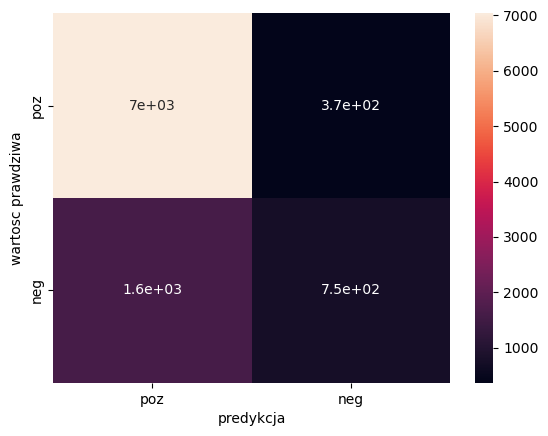

In [94]:
from sklearn.naive_bayes import GaussianNB

# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)

dokl = skl.metrics.accuracy_score(y_test,y_pred)
print("dokładność modelu: {}".format(dokl))

sns.heatmap(skl.metrics.confusion_matrix(y_test,y_pred), annot=True,xticklabels=["poz","neg"],yticklabels=["poz","neg"])
plt.xlabel("predykcja")
plt.ylabel("wartosc prawdziwa")

Przprowadź uczenie klasyfikatora dla kolumn *race* i *native_country*. Podaj dokładnosć modeli i macierze błędu wraz z ich wykresami i interpretacją. Przedstaw wnioski od czego zależą otrzymane wyniki

dokładność modelu: 0.2910226225816358


Text(50.722222222222214, 0.5, 'wartosc prawdziwa')

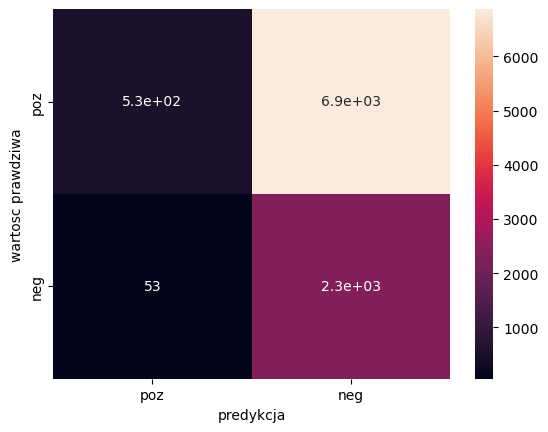

In [96]:
X = df[['race','native_country']]
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
encoder = ce.OneHotEncoder()

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)

dokl = skl.metrics.accuracy_score(y_test,y_pred)
print("dokładność modelu: {}".format(dokl))

sns.heatmap(skl.metrics.confusion_matrix(y_test,y_pred), annot=True,xticklabels=["poz","neg"],yticklabels=["poz","neg"])
plt.xlabel("predykcja")
plt.ylabel("wartosc prawdziwa")

Widać, że otrzymane wyniki różnią się od tego, na jakich danych przeprowadzamy analizę. Dokładność przedtem, była zdecydowanie większa i wartości poz-poz była największa. W tym modelu wartość poz-neg jest największa.